<center><h1> In Vechicle Coupon Recommendation Using Classification Algorithm </h1> </center>

##Dataset Information
This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver.

<h3>Attribute Information: </h3>

 -  destination: No Urgent Place, Home, Work 

 - passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)

 - weather: Sunny, Rainy, Snowy
 - temperature:55, 80, 30
 - time: 2PM, 10AM, 6PM, 7AM, 10PM
 - coupon: Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)

 - expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
 - gender: Female, Male
 - age: 21, 46, 26, 31, 41, 50plus, 36, below21
 - maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
 - hasChildren:1, 0 
 - education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School 
 - occupation: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry 
 - income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500    
 - Bar: never, less1, 1~3, gt8, nan4~8 (feature meaning: how many times do you go to a bar every month?) 
 - CoffeeHouse: never, less1, 4~8, 1~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?) 
 - CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)  
 - RestaurantLessThan20: 4~8, 1~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?) 
 - Restaurant20To50: 1~3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)  
 - toCouponGEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
 - toCouponGEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)    
 - directionsame:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
 - direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
 - Y:1, 0 (whether the coupon is accepted)

# Importing Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##Data Load

In [ ]:
vehicle_data = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
vehicle_data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


# Exploratory Data Analysis

In [ ]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Here, we can see that there are 26 columns and 12684 observations. Only 8 attributes are numerical and rest of the attributes are categorical.

In [ ]:
vehicle_data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

There are some missing values. Maximum missing value is in `Car attribute` about 12576 within 12684 and `Bar`,`CoffeHouse`, `CarryAway`, `RestaurantLessThan20`, `Restaurant20T50` are missing values with respectively 107,  217, 151, 130, 189.

In [ ]:
vehicle_data['car'].value_counts().to_frame()

,car
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


In [ ]:
##Finding the special characters in the data frame
vehicle_data.isin(['?']).sum(axis = 0)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

There have no special characters in any attributes. If any special characters remain , we will handle it.

In [ ]:
vehicle_data.drop('car', axis = 1, inplace = True)

In [ ]:
#vehicle_data.info()

In [ ]:
#Replacing the special character to nan and then drop the columns
#vehicle_data['car'] = vehicle_data['car'].replace('NaN',np.nan)
vehicle_data['CarryAway'] = vehicle_data['CarryAway'].replace('?',np.nan)
#Dropping the NaN rows now 
vehicle_data.dropna(how='any',inplace=True)

In [ ]:
vehicle_data.drop_duplicates(inplace = True)

In [ ]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

Here , after missing data handling we get new data format. There are 25 columns and 12007 entries.

In [ ]:
vehicle_data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12007.000000,12007.000000,12007.0,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000
mean,63.301408,0.408845,1.0,0.559507,0.116266,0.215957,0.784043,0.568418
std,19.131641,0.491641,0.0,0.496467,0.320556,0.411502,0.411502,0.495317
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


###Pair Plot 

## Convert Non-numeric data  to Numeric Using LabelEncoder

In [ ]:
le = LabelEncoder()

for i in vehicle_data:
   if vehicle_data[i].dtypes == 'object':
     vehicle_data[i] = le.fit_transform(vehicle_data[i])

vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12007 non-null  int64
 1   passanger             12007 non-null  int64
 2   weather               12007 non-null  int64
 3   temperature           12007 non-null  int64
 4   time                  12007 non-null  int64
 5   coupon                12007 non-null  int64
 6   expiration            12007 non-null  int64
 7   gender                12007 non-null  int64
 8   age                   12007 non-null  int64
 9   maritalStatus         12007 non-null  int64
 10  has_children          12007 non-null  int64
 11  education             12007 non-null  int64
 12  occupation            12007 non-null  int64
 13  income                12007 non-null  int64
 14  Bar                   12007 non-null  int64
 15  CoffeeHouse           12007 non-null  int64
 16  Car

In [ ]:
vehicle_data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,1,0,2,55,2,4,0,1,0,2,0,1,0,5,4,3,1,1,3,1,0,0,0,1,1
23,1,1,2,80,0,2,1,1,0,2,0,1,0,5,4,3,1,1,3,1,0,0,0,1,0
24,1,1,2,80,0,0,0,1,0,2,0,1,0,5,4,3,1,1,3,1,0,0,0,1,1


In [ ]:
vehicle_data.corr()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.000000,-0.115168,-0.078963,-0.032056,0.409030,-0.009171,-0.027384,0.008610,0.000048,0.001272,-0.004366,0.008456,-0.010660,-0.014787,-0.004766,-0.007757,-0.009827,0.004419,-0.001917,NaN,0.139183,0.186576,-0.081805,0.081805,-0.004031
passanger,-0.115168,1.000000,0.061045,0.057619,-0.398416,0.017266,0.070786,-0.023961,0.010068,-0.019046,0.037983,0.000527,-0.057429,-0.003395,0.014576,-0.011082,-0.011946,-0.033858,-0.030978,NaN,0.065324,-0.192350,-0.269635,0.269635,0.049951
weather,-0.078963,0.061045,1.000000,0.433605,-0.025238,0.148736,0.021226,-0.026576,-0.016006,-0.022252,0.012661,0.008637,-0.011788,-0.035201,0.004625,-0.005792,-0.043004,-0.001266,0.005546,NaN,-0.122388,-0.208912,0.016540,-0.016540,0.095984
temperature,-0.032056,0.057619,0.433605,1.000000,-0.063285,0.130139,0.129620,-0.027043,-0.025105,-0.001382,-0.019496,0.010210,0.000835,-0.028454,0.002274,0.007528,-0.038146,0.003103,-0.000143,NaN,-0.157572,-0.226657,0.098386,-0.098386,0.054652
time,0.409030,-0.398416,-0.025238,-0.063285,1.000000,0.049725,-0.080268,-0.001943,-0.008480,0.003905,-0.007695,-0.001239,0.009369,-0.007456,-0.003821,-0.003403,-0.002129,-0.005474,0.009336,NaN,0.005417,0.284714,0.312621,-0.312621,-0.050131
coupon,-0.009171,0.017266,0.148736,0.130139,0.049725,1.000000,0.146484,0.008096,0.003425,0.000019,-0.009908,-0.001907,-0.002874,0.002714,-0.007121,-0.003813,-0.003389,0.011349,0.004999,NaN,-0.129839,-0.109045,-0.074854,0.074854,0.099649
expiration,-0.027384,0.070786,0.021226,0.129620,-0.080268,0.146484,1.000000,0.001598,0.007939,-0.012675,0.017083,-0.008319,-0.016376,-0.010778,-0.009749,-0.014396,-0.000148,-0.008941,-0.000109,NaN,0.046219,-0.025003,0.033154,-0.033154,-0.131872
gender,0.008610,-0.023961,-0.026576,-0.027043,-0.001943,0.008096,0.001598,1.000000,-0.065973,0.071738,-0.150937,0.018587,-0.010941,0.026150,-0.164558,0.063212,-0.025356,0.021880,-0.010408,NaN,-0.004886,0.004659,-0.005724,0.005724,0.045187
age,0.000048,0.010068,-0.016006,-0.025105,-0.008480,0.003425,0.007939,-0.065973,1.000000,-0.174470,0.309365,0.084224,-0.023027,0.046567,0.208126,-0.002304,0.086703,-0.039922,0.004631,NaN,0.029671,0.000090,-0.011695,0.011695,-0.037003
maritalStatus,0.001272,-0.019046,-0.022252,-0.001382,0.003905,0.000019,-0.012675,0.071738,-0.174470,1.000000,-0.450707,0.060461,0.142512,0.081769,-0.114484,0.004830,-0.027452,-0.000837,0.038253,NaN,-0.051194,0.005924,0.017156,-0.017156,0.024933


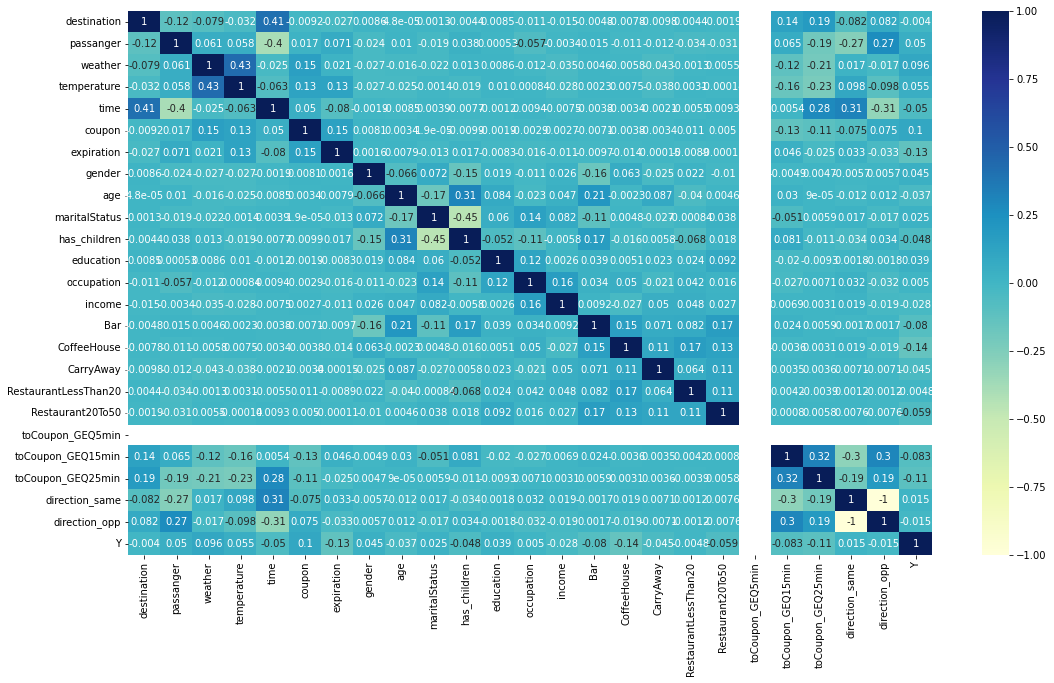

In [ ]:
plt.figure(figsize=(18, 10))
heatmap_vehicle = sns.heatmap(data=vehicle_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

fig = heatmap_vehicle.get_figure()
fig.savefig("heatmap_vehicle.png")

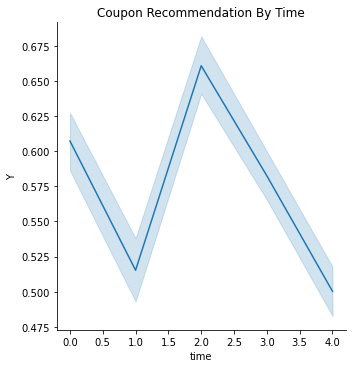

In [ ]:
g3 = sns.relplot(x="time", y="Y", kind="line", data=vehicle_data)
g.figure.autofmt_xdate()
plt.title("Coupon Recommendation By Time")
plt.show()

#fig = g.get_figure()
g3.savefig("rcmnd_time.png")

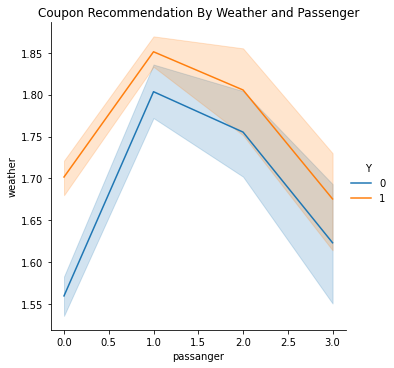

In [ ]:
g2 = sns.relplot(x="passanger", y="weather", hue = "Y", kind="line", data=vehicle_data)
g.figure.autofmt_xdate()
plt.title("Coupon Recommendation By Weather and Passenger")
plt.show()

#fig = heatmap_vehicle.get_figure()
g2.savefig("w_p_cremnd.png")

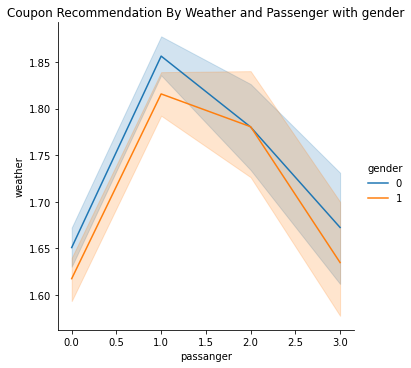

In [ ]:
g1 = sns.relplot(x="passanger", y="weather", hue = "gender", kind="line", data=vehicle_data)
g.figure.autofmt_xdate()
plt.title("Coupon Recommendation By Weather and Passenger with gender")
plt.show()

#fig = heatmap_vehicle.get_figure()
g1.savefig("wp_g_crmnd.png")

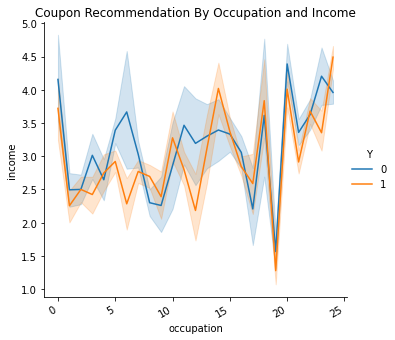

In [ ]:
g = sns.relplot(x="occupation", y="income", hue = "Y", kind="line", data=vehicle_data)
g.figure.autofmt_xdate()
plt.title("Coupon Recommendation By Occupation and Income")
plt.show()

#fig = g.get_figure()
g.savefig("o_i_crmnd.png")

#Splitting the dataset into train and test sets

In [ ]:
X = vehicle_data.drop('Y', axis = 1)
y = vehicle_data[['Y']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 102)
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (9605, 24)
X_test Shape :  (2402, 24)
y_train Shape :  (9605, 1)
y_test Shape :  (2402, 1)


### Features Scaling before machine learning model

In [ ]:
scaling = MinMaxScaler(feature_range=(0,1))

rescaled_train = scaling.fit_transform(X_train)
rescaled_test = scaling.fit_transform(X_test)

#Machine learning Model and Evaluate performance them

### Logistic Regression 

In [ ]:
lr_model = LogisticRegression()

lr_model.fit(rescaled_train, y_train)

y_pred = lr_model.predict(rescaled_test)
#score_lr = lr_model.accuracy_score(rescaled_test,y_test)
#print('The accuracy of the Random Forest Model is', score_lr)
#targets = ['0' , '1']
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.64      0.45      0.53      1055
           1       0.65      0.80      0.72      1347

    accuracy                           0.65      2402
   macro avg       0.64      0.62      0.62      2402
weighted avg       0.64      0.65      0.63      2402



### Random Forest Classifier 

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(rescaled_train, y_train)
y_pred = rf_model.predict(rescaled_test)
score_RF = rf_model.score(rescaled_test,y_test)
print('The accuracy of the Random Forest Model is', score_RF)
#targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of the Random Forest Model is 0.7593671940049959
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1055
           1       0.76      0.83      0.80      1347

    accuracy                           0.76      2402
   macro avg       0.76      0.75      0.75      2402
weighted avg       0.76      0.76      0.76      2402



### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(rescaled_train, y_train)
y_pred = dt_model.predict(rescaled_test)
score_dt = dt_model.score(rescaled_test,y_test)
print('The accuracy of the Decision Tree Model is', score_dt)
#targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred))

The accuracy of the Decision Tree Model is 0.6798501248959201
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1055
           1       0.71      0.72      0.72      1347

    accuracy                           0.68      2402
   macro avg       0.67      0.67      0.67      2402
weighted avg       0.68      0.68      0.68      2402



### Support Vector Machine 

In [ ]:
# Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(rescaled_train, y_train)
y_pred = svm_model.predict(rescaled_test)
score_svm = svm_model.score(rescaled_test,y_test)
print('The accuracy of the Support Vector Machine Model is', score_svm)
#targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the Support Vector Machine Model is 0.6869275603663614
              precision    recall  f1-score   support

           0       0.68      0.53      0.60      1055
           1       0.69      0.81      0.74      1347

    accuracy                           0.69      2402
   macro avg       0.69      0.67      0.67      2402
weighted avg       0.69      0.69      0.68      2402



### K-Nearest Neighbors Classifier

In [ ]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(rescaled_train, y_train)
y_pred = knn_model.predict(rescaled_test)
score_knn = knn_model.score(rescaled_test,y_test)
print('The accuracy of the K-Nearest Neighbors Model is', score_knn)
#targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the K-Nearest Neighbors Model is 0.6432139883430474
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1055
           1       0.67      0.73      0.70      1347

    accuracy                           0.64      2402
   macro avg       0.64      0.63      0.63      2402
weighted avg       0.64      0.64      0.64      2402



###Gaussian Naive Bayes


In [ ]:
# Gaussian Naive Bayes
GNB_model = GaussianNB()
GNB_model.fit(rescaled_train, y_train)
y_pred = GNB_model.predict(rescaled_test)
score_GNB = GNB_model.score(rescaled_test,y_test)
print('The accuracy of Gaussian Naive Bayes model is', score_GNB)
#targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred))

The accuracy of Gaussian Naive Bayes model is 0.6232306411323897
              precision    recall  f1-score   support

           0       0.61      0.40      0.48      1055
           1       0.63      0.80      0.70      1347

    accuracy                           0.62      2402
   macro avg       0.62      0.60      0.59      2402
weighted avg       0.62      0.62      0.61      2402



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
